In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Rescaling
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
class_names = [
    "T-shirt/top",   # 0
    "Trouser",       # 1
    "Pullover",      # 2
    "Dress",         # 3
    "Coat",          # 4
    "Sandal",        # 5
    "Shirt",         # 6
    "Sneaker",       # 7
    "Bag",           # 8
    "Ankle boot"     # 9
]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
train_size = int(0.8 * 60000)
val_size = 60000 - train_size
val_dataset = train_dataset.skip(train_size)
train_dataset = train_dataset.take(train_size)
len(train_dataset), len(val_dataset)


(48000, 12000)

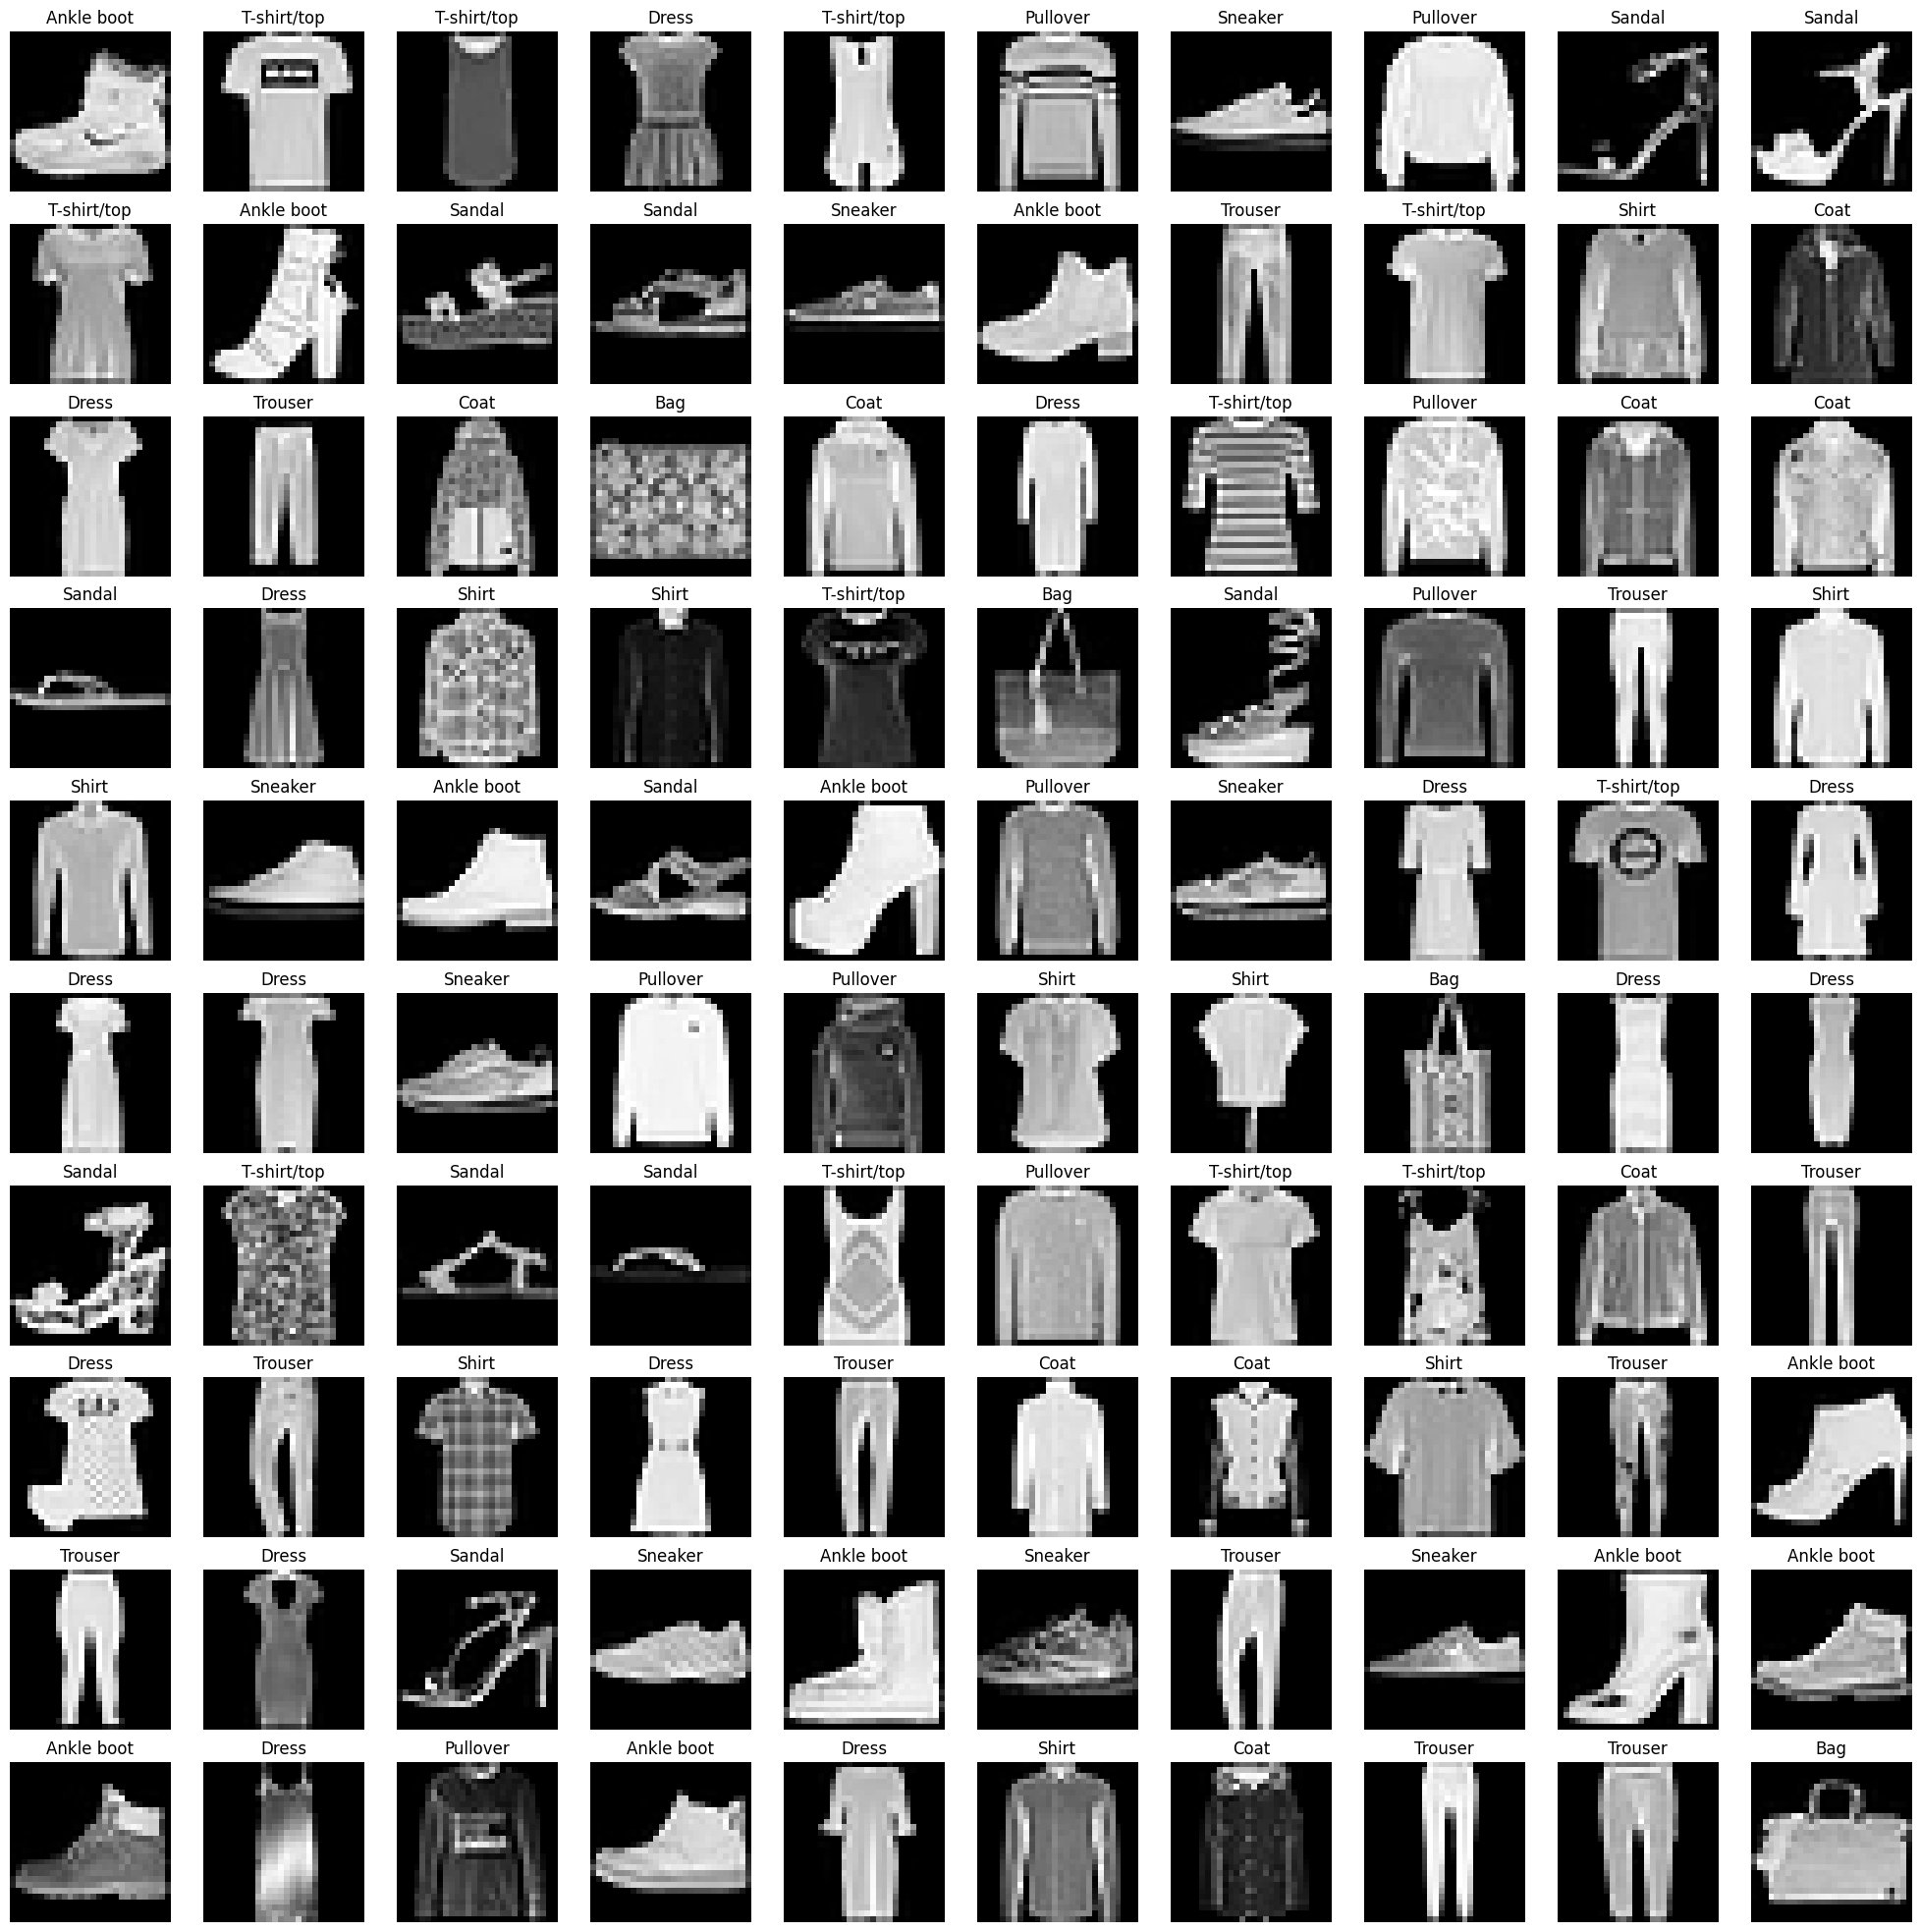

In [ ]:
plt.figure(figsize=(25, 25))
for i, (img, label) in enumerate(train_dataset.take(100), start=1):
    plt.subplot(10, 10, i)
    plt.imshow(img, cmap='gray')
    plt.title(class_names[label])
    plt.axis('off')

In [ ]:
train_dataset = train_dataset.shuffle(buffer_size=X_train.shape[0]).batch(32)
val_dataset = val_dataset.batch(32)
test_dataset = test_dataset.batch(32)

In [ ]:
def build_and_train_model(train_dataset, val_dataset, test_dataset, optimizer, regularizer=None, epochs=10):
    model = Sequential([
        Input((28, 28)),
        Rescaling(1./255),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=regularizer),
        Dense(64, activation='relu', kernel_regularizer=regularizer),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset, verbose=1)
    loss, accuracy = model.evaluate(test_dataset, verbose=0)
    print(f"Test Accuracy with {optimizer.__class__.__name__} (LR={optimizer.learning_rate.numpy()}, Regularizer={regularizer.__class__.__name__}): {accuracy:2f}")
    return model, loss, history, accuracy

In [ ]:
model_sgd, loss_sgd, history_sgd, accuracy_sgd = build_and_train_model(train_dataset, val_dataset, test_dataset, SGD(learning_rate=0.01))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7275 - loss: 0.7607 - val_accuracy: 0.8180 - val_loss: 0.4751
Epoch 2/10
 405/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8276 - loss: 0.4897

KeyboardInterrupt: 

In [ ]:
model_sgd_m, loss_sgd_m, history_sgd_m, accuracy_sgd_m = build_and_train_model(train_dataset, val_dataset, test_dataset, SGD(learning_rate=0.01, momentum=0.9))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7416 - loss: 0.7462 - val_accuracy: 0.8441 - val_loss: 0.4254
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8521 - loss: 0.4148 - val_accuracy: 0.8620 - val_loss: 0.3851
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8665 - loss: 0.3637 - val_accuracy: 0.8599 - val_loss: 0.3842
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8764 - loss: 0.3330 - val_accuracy: 0.8670 - val_loss: 0.3646
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8814 - loss: 0.3208 - val_accuracy: 0.8741 - val_loss: 0.3441
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8901 - loss: 0.2957 - val_accuracy: 0.8801 - val_loss: 0.3314
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8907 - loss: 0.2888 - val_accuracy: 0.8766 - val_loss: 0.3487
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8998 - loss: 0.2777 -

In [ ]:
model_adam, loss_adam, history_adam, accuracy_adam = build_and_train_model(train_dataset, val_dataset, test_dataset, Adam(learning_rate=0.001))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7734 - loss: 0.6519 - val_accuracy: 0.8533 - val_loss: 0.4103
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8572 - loss: 0.3929 - val_accuracy: 0.8551 - val_loss: 0.3877
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8737 - loss: 0.3426 - val_accuracy: 0.8748 - val_loss: 0.3602
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8825 - loss: 0.3152 - val_accuracy: 0.8797 - val_loss: 0.3371
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8910 - loss: 0.2933 - val_accuracy: 0.8752 - val_loss: 0.3531
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8912 - loss: 0.2862 - val_accuracy: 0.8722 - val_loss: 0.3400
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8966 - loss: 0.2718 - val_accuracy: 0.8802 - val_loss: 0.3377
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9061 - loss: 0.2532 

In [ ]:
model_rms, loss_rms, history_rms, accuracy_rms = build_and_train_model(train_dataset, val_dataset, test_dataset, RMSprop(learning_rate=0.001))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7638 - loss: 0.6639 - val_accuracy: 0.8483 - val_loss: 0.4231
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8568 - loss: 0.3964 - val_accuracy: 0.8403 - val_loss: 0.4478
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8712 - loss: 0.3584 - val_accuracy: 0.8672 - val_loss: 0.3810
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8797 - loss: 0.3368 - val_accuracy: 0.8749 - val_loss: 0.3629
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8849 - loss: 0.3265 - val_accuracy: 0.8329 - val_loss: 0.5524
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8849 - loss: 0.3213 - val_accuracy: 0.8802 - val_loss: 0.3992
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8916 - loss: 0.3096 - val_accuracy: 0.8772 - val_loss: 0.3637
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8923 - loss: 0.3061 

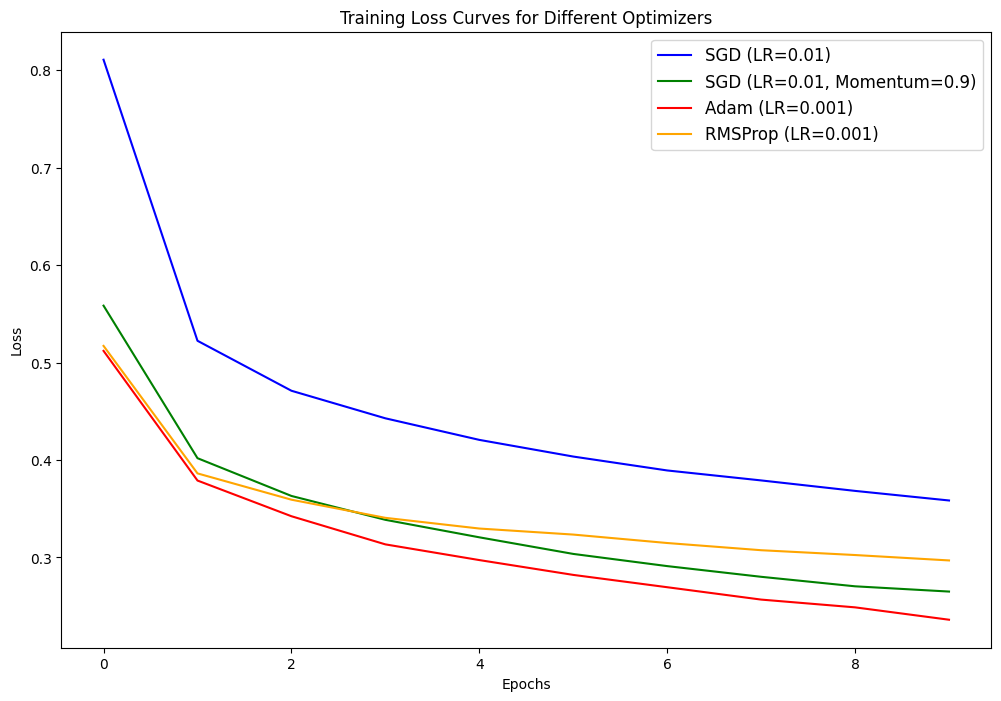

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history_sgd.history['loss'], label="SGD (LR=0.01)", color="blue")
plt.plot(history_sgd_m.history['loss'], label="SGD (LR=0.01, Momentum=0.9)", color="green")
plt.plot(history_adam.history['loss'], label="Adam (LR=0.001)", color="red")
plt.plot(history_rms.history['loss'], label="RMSProp (LR=0.001)", color="orange")
plt.title("Training Loss Curves for Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='best', fontsize=12)

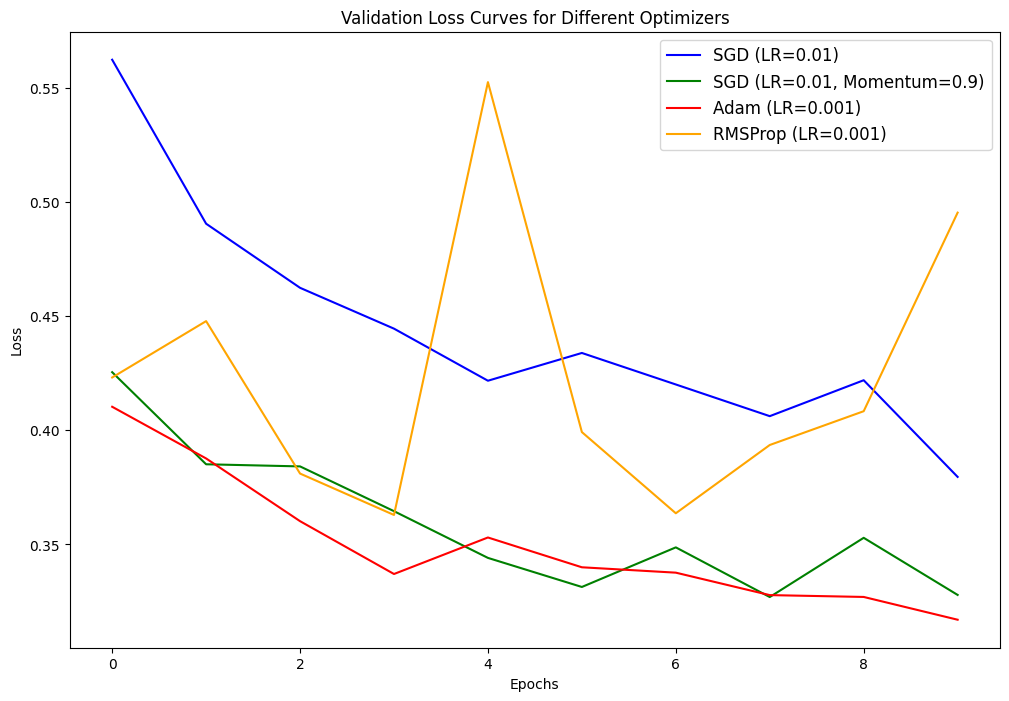

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history_sgd.history['val_loss'], label="SGD (LR=0.01)", color="blue")
plt.plot(history_sgd_m.history['val_loss'], label="SGD (LR=0.01, Momentum=0.9)", color="green")
plt.plot(history_adam.history['val_loss'], label="Adam (LR=0.001)", color="red")
plt.plot(history_rms.history['val_loss'], label="RMSProp (LR=0.001)", color="orange")
plt.title("Validation Loss Curves for Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='best', fontsize=12)

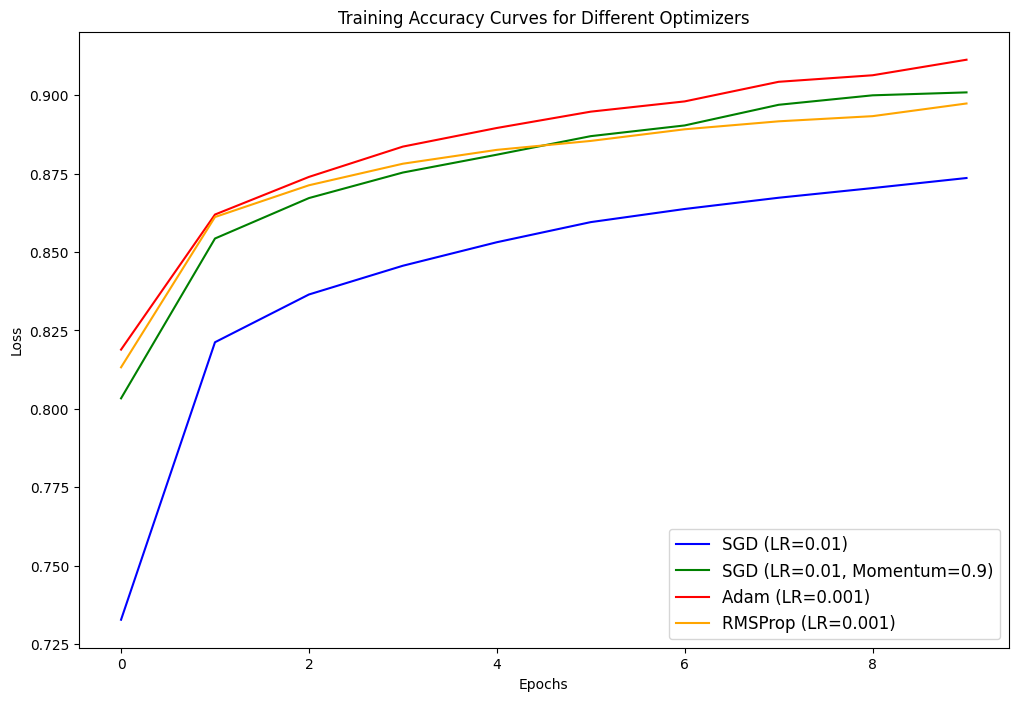

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history_sgd.history['accuracy'], label="SGD (LR=0.01)", color="blue")
plt.plot(history_sgd_m.history['accuracy'], label="SGD (LR=0.01, Momentum=0.9)", color="green")
plt.plot(history_adam.history['accuracy'], label="Adam (LR=0.001)", color="red")
plt.plot(history_rms.history['accuracy'], label="RMSProp (LR=0.001)", color="orange")
plt.title("Training Accuracy Curves for Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='best', fontsize=12)

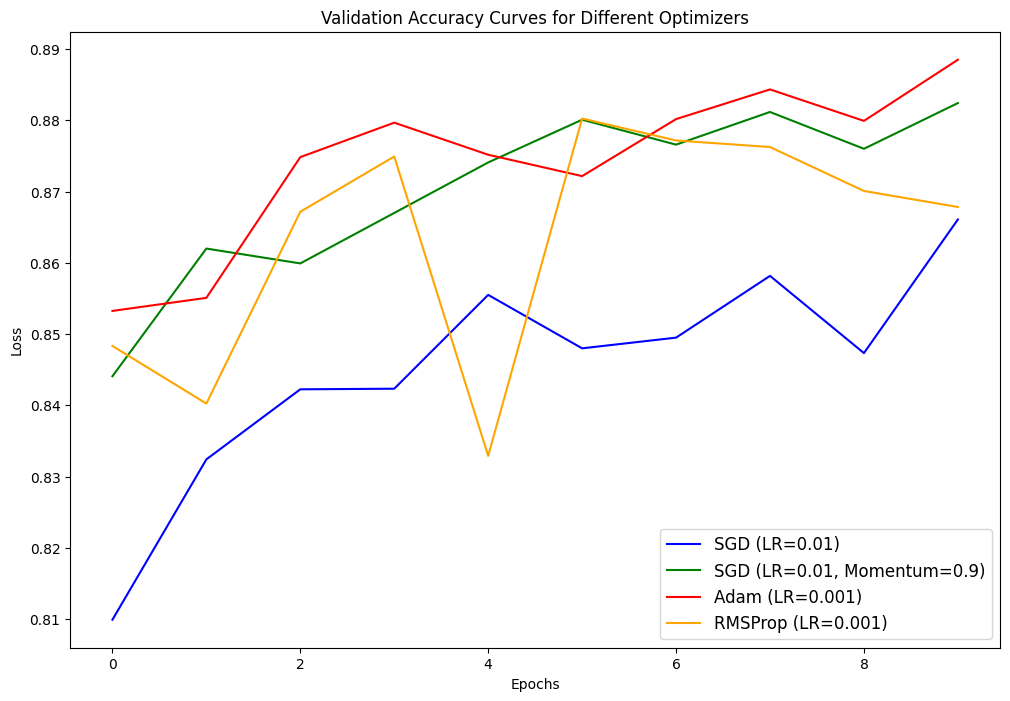

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history_sgd.history['val_accuracy'], label="SGD (LR=0.01)", color="blue")
plt.plot(history_sgd_m.history['val_accuracy'], label="SGD (LR=0.01, Momentum=0.9)", color="green")
plt.plot(history_adam.history['val_accuracy'], label="Adam (LR=0.001)", color="red")
plt.plot(history_rms.history['val_accuracy'], label="RMSProp (LR=0.001)", color="orange")
plt.title("Validation Accuracy Curves for Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='best', fontsize=12)

Text(0, 0.5, 'Accuracy')

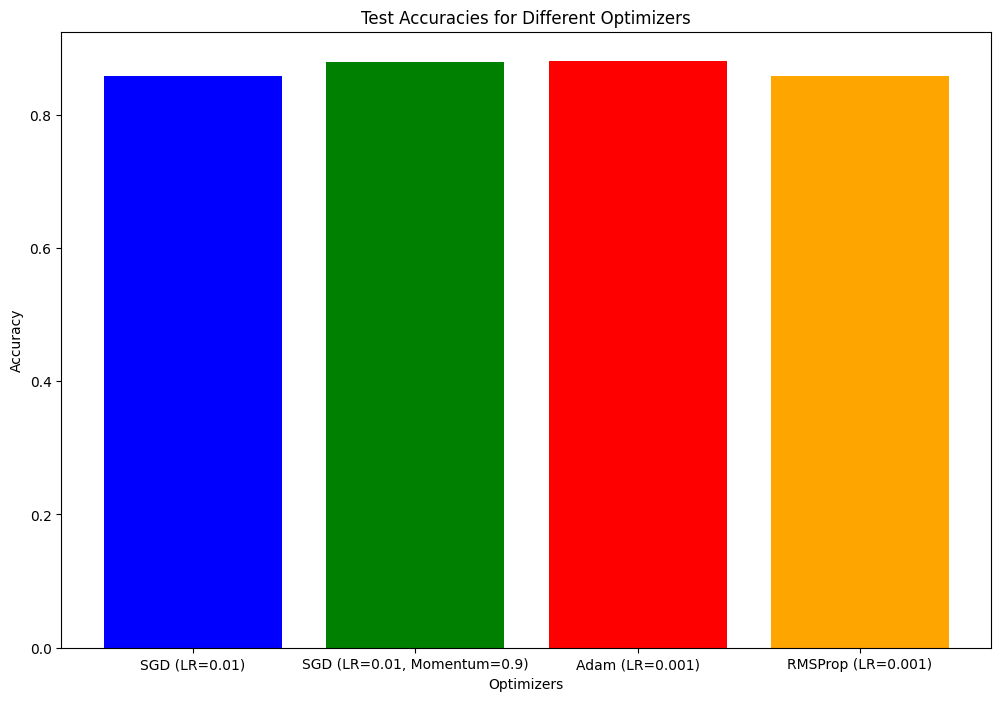

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(['SGD (LR=0.01)', 'SGD (LR=0.01, Momentum=0.9)', 'Adam (LR=0.001)', 'RMSProp (LR=0.001)'], [accuracy_sgd, accuracy_sgd_m, accuracy_adam, accuracy_rms], color=['blue', 'green', 'red', 'orange'])
plt.title("Test Accuracies for Different Optimizers")
plt.xlabel("Optimizers")
plt.ylabel("Accuracy")

In [ ]:
def build_and_train_dropout_model(train_dataset, val_dataset, test_dataset, optimizer, regularizer=None, epochs=10):
    model = Sequential([
        Input((28, 28)),
        Rescaling(1./255),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=regularizer),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=regularizer),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset, verbose=1)
    loss, accuracy = model.evaluate(test_dataset, verbose=0)
    print(f"Test Accuracy with {optimizer.__class__.__name__} (LR={optimizer.learning_rate.numpy()}, Regularizer={regularizer.__class__.__name__}): {accuracy:2f}")
    return model, loss, history, accuracy

In [ ]:
model_adam_l2, loss_adam_l2, history_adam_l2, accuracy_adam_l2 = build_and_train_model(train_dataset, val_dataset, test_dataset, Adam(learning_rate=0.001), epochs=20, regularizer=l2(0.001))



Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7633 - loss: 0.8911 - val_accuracy: 0.8473 - val_loss: 0.5743
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8453 - loss: 0.5628 - val_accuracy: 0.8428 - val_loss: 0.5503
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8558 - loss: 0.5082 - val_accuracy: 0.8568 - val_loss: 0.5132
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8590 - loss: 0.4885 - val_accuracy: 0.8584 - val_loss: 0.5015
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8604 - loss: 0.4721 - val_accuracy: 0.8624 - val_loss: 0.4771
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8679 - loss: 0.4499 - val_accuracy: 0.8652 - val_loss: 0.4597
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8702 - loss: 0.4396 - val_accuracy: 0.8593 - val_loss: 0.4651
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8732 - loss: 0.4

In [ ]:
model_adam_l2_d, loss_adam_l2_d, history_adam_l2_d, accuracy_adam_l2_d = build_and_train_dropout_model(train_dataset, val_dataset, test_dataset, Adam(learning_rate=0.001), regularizer=l2(0.01), epochs=20)



Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6659 - loss: 1.8824 - val_accuracy: 0.7943 - val_loss: 0.7970
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7699 - loss: 0.8688 - val_accuracy: 0.8115 - val_loss: 0.7250
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7778 - loss: 0.8187 - val_accuracy: 0.8106 - val_loss: 0.7302
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7810 - loss: 0.8009 - val_accuracy: 0.8161 - val_loss: 0.6931
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7803 - loss: 0.7942 - val_accuracy: 0.8151 - val_loss: 0.6969
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7825 - loss: 0.7854 - val_accuracy: 0.8177 - val_loss: 0.6709
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7874 - loss: 0.7731 - val_accuracy: 0.8185 - val_loss: 0.6698
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7835 - loss: 0.7763 

In [ ]:
model_adam_d, loss_adam_d, history_adam_d, accuracy_adam_d = build_and_train_dropout_model(train_dataset, val_dataset, test_dataset, Adam(learning_rate=0.001), epochs=20)



Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6838 - loss: 0.8838 - val_accuracy: 0.8436 - val_loss: 0.4269
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8269 - loss: 0.4857 - val_accuracy: 0.8528 - val_loss: 0.4014
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8405 - loss: 0.4414 - val_accuracy: 0.8668 - val_loss: 0.3708
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8490 - loss: 0.4123 - val_accuracy: 0.8682 - val_loss: 0.3675
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8573 - loss: 0.3889 - val_accuracy: 0.8665 - val_loss: 0.3708
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8577 - loss: 0.3911 - val_accuracy: 0.8681 - val_loss: 0.3554
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8653 - loss: 0.3714 - val_accuracy: 0.8712 - val_loss: 0.3553
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8698 - loss: 0.3577 